In [7]:
import pandas as pd
import spacy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [8]:
nlp = spacy.load("en_core_web_sm")

In [9]:
def extract_features(text):
    doc = nlp(text)
    num_tokens = len(doc)
    num_sentences = len(list(doc.sents))
    avg_sentence_len = num_tokens / num_sentences if num_sentences > 0 else 0
    punctuation_count = sum(1 for token in doc if token.is_punct)
    stopword_ratio = sum(1 for token in doc if token.is_stop) / num_tokens
    pos_counts = doc.count_by(spacy.attrs.POS)
    noun_ratio = pos_counts.get(nlp.vocab.strings["NOUN"], 0) / num_tokens
    verb_ratio = pos_counts.get(nlp.vocab.strings["VERB"], 0) / num_tokens
    adj_ratio = pos_counts.get(nlp.vocab.strings["ADJ"], 0) / num_tokens
    return {
        "avg_sentence_len": avg_sentence_len,
        "punctuation_count": punctuation_count,
        "stopword_ratio": stopword_ratio,
        "noun_ratio": noun_ratio,
        "verb_ratio": verb_ratio,
        "adj_ratio": adj_ratio
    }


In [10]:
df = pd.read_csv("data.csv")

In [11]:
#extract features
features = df['text'].apply(extract_features)
X = pd.DataFrame(features.tolist())
y = LabelEncoder().fit_transform(df['label'])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = model.predict(X_test)

In [21]:
import pprint
pprint.pprint(classification_report(y_test, y_pred, output_dict=True))

{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 1.0},
 '1': {'f1-score': 0.6666666666666666,
       'precision': 1.0,
       'recall': 0.5,
       'support': 2.0},
 '2': {'f1-score': 0.75, 'precision': 0.6, 'recall': 1.0, 'support': 3.0},
 'accuracy': 0.6666666666666666,
 'macro avg': {'f1-score': 0.47222222222222215,
               'precision': 0.5333333333333333,
               'recall': 0.5,
               'support': 6.0},
 'weighted avg': {'f1-score': 0.5972222222222222,
                  'precision': 0.6333333333333333,
                  'recall': 0.6666666666666666,
                  'support': 6.0}}


/home/pujandev/base/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/pujandev/base/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/pujandev/base/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("\n🔀 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


🔀 Confusion Matrix:
[[0 0 1]
 [0 1 1]
 [0 0 3]]


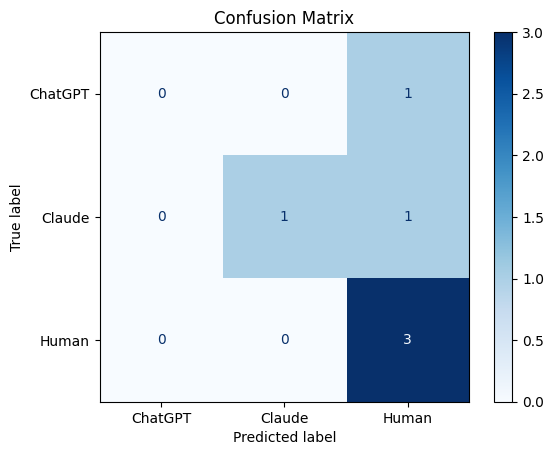

In [29]:
# Optional: show labels if you want class names instead of numbers
labels = ["ChatGPT", "Claude", "Human"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

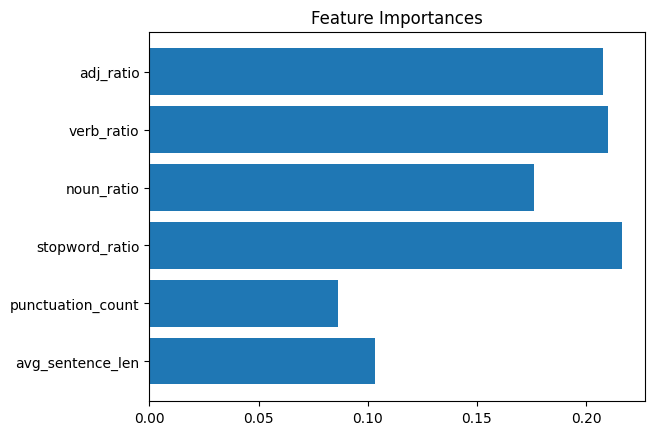

In [19]:
# Plot feature importances
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importances")
plt.show()

In [20]:
def predict(text):
    feats = extract_features(text)
    df_feats = pd.DataFrame([feats])
    pred = model.predict(df_feats)[0]
    label = ["ChatGPT", "Claude", "Human"][pred]
    print(f"Prediction: {label}")

predict("In light of recent developments in AI, we propose a modular architecture for robustness.")


Prediction: Claude
